# Проект: промышленность

## Описание проекта

Данный проект подразумевает под собой разработку модели для имитации технологического процесса.

## Цель проекта

Построить модель, которая будет предсказывать температуру сплава

## Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:

data_arc_new.csv — данные об электродах;

data_bulk_new.csv — данные о подаче сыпучих материалов (объём);

data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);

data_gas_new.csv — данные о продувке сплава газом;

data_temp_new.csv — результаты измерения температуры;

data_wire_new.csv — данные о проволочных материалах (объём);

data_wire_time_new.csv — данные о проволочных материалах (время).

## План работы

1. Загрузка данных

2. Исследовательский анализ и предобработка данных

3. Объединение данных

4. Исследовательский анализ и предобработка данных объединённого датафрейма

5. Подготовка данных

6. Обучение моделей машинного обучения

7. Выбор лучшей модели

8. Общий вывод и рекомендации заказчику

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose
import os
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import math
from phik import resources, report
from phik.phik import phik_matrix
import seaborn as sns

## Загрузка данных

In [3]:
#анализируем 1 набор данных
df_1 = pd.read_csv('/datasets/data_arc_new.csv', sep = ',')
#ищем дубликаты
print(df_1.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_1.head(10))
#выводим информацию о таблице
print(df_1.info())

0
   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   
5    2  2019-05-03 11:34:14  2019-05-03 11:36:31           0.381124   
6    2  2019-05-03 11:38:50  2019-05-03 11:44:28           0.261665   
7    2  2019-05-03 11:46:19  2019-05-03 11:48:25           0.710297   
8    2  2019-05-03 11:49:48  2019-05-03 11:53:18           0.786322   
9    3  2019-05-03 12:06:54  2019-05-03 12:11:34           1.101678   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691  
5             0.220351  
6             0.205527  
7             0.

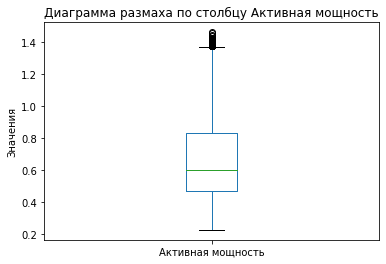

In [4]:
#строим диаграммы размаха для столбцов, где выбросы надо будет удалять
df_1['Активная мощность'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Активная мощность', ylabel = 'Значения')
plt.show()

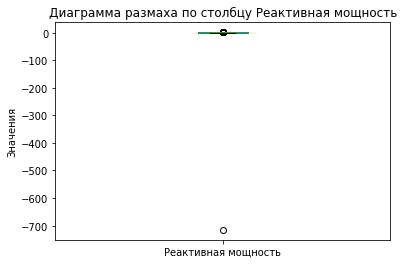

In [5]:
df_1['Реактивная мощность'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Реактивная мощность', ylabel = 'Значения')
plt.show()

Имеется неправильный тип данных в столбце с датой и имеются аномальные значение в столбце с реактивной мощностью, все будет исправлено в предобработке.

In [6]:
#анализируем 2 набор данных
df_2 = pd.read_csv('/datasets/data_bulk_new.csv', sep = ',')
#ищем дубликаты
print(df_2.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_2.head(10))
#выводим информацию о таблице
print(df_2.info())

0
   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   
5    6     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
6    7     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
7    8     NaN     NaN     NaN    99.0     NaN     NaN     NaN     NaN   
8    9     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
9   10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    14

<AxesSubplot:>

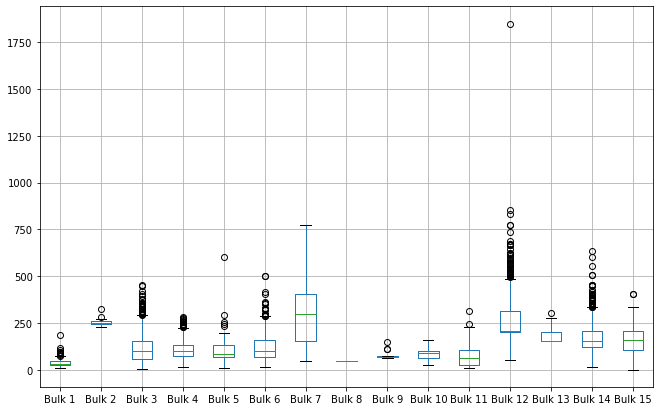

In [7]:
df_2_2 = df_2.drop(['key'], axis=1)
df_2_2.boxplot(figsize = (11, 7))

Nan значения тут не трогаем.

In [8]:
#анализируем 3 набор данных
df_3 = pd.read_csv('/datasets/data_bulk_time_new.csv', sep = ',')
#ищем дубликаты
print(df_3.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_3.head(10))
#выводим информацию о таблице
print(df_3.info())

0
   key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   
5    6    NaN    NaN    NaN  2019-05-03 13:57:27    NaN    NaN    NaN    NaN   
6    7    NaN    NaN    NaN  2019-05-03 14:18:58    NaN    NaN    NaN    NaN   
7    8    NaN    NaN    NaN  2019-05-03 15:17:58    NaN    NaN    NaN    NaN   
8    9    NaN    NaN    NaN  2019-05-03 16:03:08    NaN    NaN    NaN    NaN   
9   10    NaN    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11

Имеется неправильный тип данных в столбце с датой все будет исправлено в предобработке. Nan значения тут не трогаем.

In [9]:
#анализируем 4 набор данных
df_4 = pd.read_csv('/datasets/data_gas_new.csv', sep = ',')
#ищем дубликаты
print(df_4.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_4.head(10))
#выводим информацию о таблице
print(df_4.info())

0
   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
5    6  11.273392
6    7   9.836267
7    8  15.171553
8    9   8.216623
9   10   6.529891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


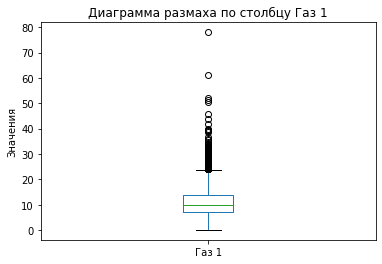

In [10]:
df_4['Газ 1'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Газ 1', ylabel = 'Значения')
plt.show()

С данными все хорошо

In [11]:
#анализируем 5 набор данных
df_5 = pd.read_csv('/datasets/data_temp_new.csv', sep = ',')
#ищем дубликаты
print(df_5.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_5)
#выводим информацию о таблице
print(df_5.info())

0
        key         Время замера  Температура
0         1  2019-05-03 11:02:04       1571.0
1         1  2019-05-03 11:07:18       1604.0
2         1  2019-05-03 11:11:34       1618.0
3         1  2019-05-03 11:18:04       1601.0
4         1  2019-05-03 11:25:59       1606.0
...     ...                  ...          ...
18087  3241  2019-09-06 16:55:01          NaN
18088  3241  2019-09-06 17:06:38          NaN
18089  3241  2019-09-06 17:21:48          NaN
18090  3241  2019-09-06 17:24:44          NaN
18091  3241  2019-09-06 17:30:05          NaN

[18092 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None


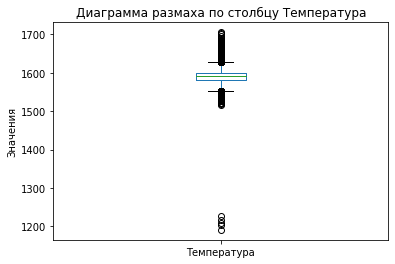

In [12]:
df_5['Температура'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Температура', ylabel = 'Значения')
plt.show()

Имеются пропущенные значения в столбце с температурой, данные строки будут удалены. В столбце с датой будет изменен тип данных на правильный. Значения температура должны быть 1400+, будет исправлено.

In [13]:
#анализируем 6 набор данных
df_6 = pd.read_csv('/datasets/data_wire_new.csv', sep = ',')
#ищем дубликаты
print(df_6.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_6.head(10))
#выводим информацию о таблице
print(df_6.info())

0
   key      Wire 1     Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1   60.059998        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2   96.052315        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3   91.160157        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4   89.063515        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5   89.238236   9.114560     NaN     NaN     NaN     NaN     NaN     NaN   
5    6   99.109917   9.114560     NaN     NaN     NaN     NaN     NaN     NaN   
6    7   98.061600        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7    8  155.282394        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8    9  113.393279   9.143681     NaN     NaN     NaN     NaN     NaN     NaN   
9   10   81.244796  12.376000     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN 

<AxesSubplot:>

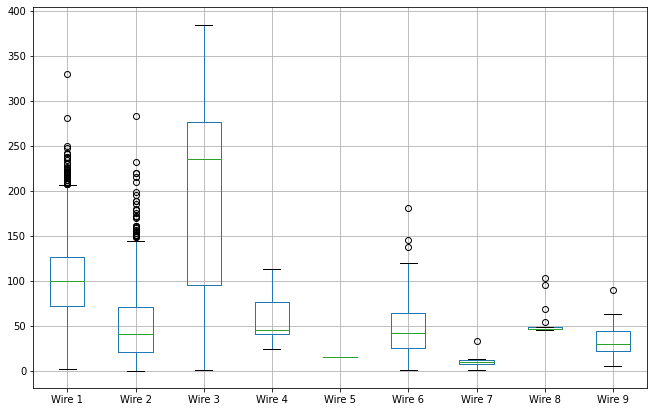

In [14]:
df_6_2 = df_6.drop(['key'], axis=1)
df_6_2.boxplot(figsize = (11, 7))

С данным все хорошо.

In [15]:
#анализируем 7 набор данных
df_7 = pd.read_csv('/datasets/data_wire_time_new.csv', sep = ',')
#ищем дубликаты
print(df_7.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_7.head(10))
#выводим информацию о таблице
print(df_7.info())

0
   key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   
5    6  2019-05-03 13:57:27  2019-05-03 13:48:52    NaN    NaN    NaN    NaN   
6    7  2019-05-03 14:18:58                  NaN    NaN    NaN    NaN    NaN   
7    8  2019-05-03 15:01:30                  NaN    NaN    NaN    NaN    NaN   
8    9  2019-05-03 15:45:44  2019-05-03 15:39:37    NaN    NaN    NaN    NaN   
9   10  2019-05-03 16:27:00  2019-05-03 16:22:36    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN  

Имеется неправильный тип данных в столбце с датой все будет исправлено в предобработке. Nan значения тут не трогаем.

## Исследовательский анализ и предобработка данных

In [16]:
#строим функцию для удаления аномалий
def remove_outliers(data, column_name, threshold=1.5):
    
    # Вычисляем квартили для столбца
    Q1 = data[column_name].quantile(0.05)
    Q3 = data[column_name].quantile(0.95)
    
    # Вычисляем IQR
    IQR = Q3 - Q1
    
    # Вычисляем границы для определения выбросов
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Удаляем выбросы
    data_cleaned = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    
    return data_cleaned

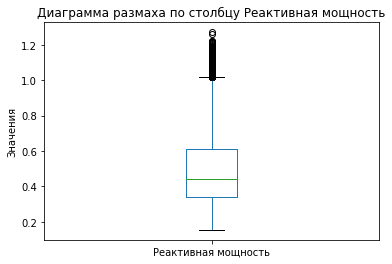

In [17]:
#удаляем аномалии
df_1 = df_1[df_1['Реактивная мощность'] > 0]
df_1['Реактивная мощность'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Реактивная мощность', ylabel = 'Значения')
plt.show()

In [18]:
#Для правильного мерживания оставим только нужную нам температуру(последнюю)
# Преобразование столбца 'Время замера' в тип datetime
df_5['Время замера'] = pd.to_datetime(df_5['Время замера'])

# Выбор последних записей из каждой группы
last_temp_per_key = df_5.groupby('key').tail(1)

# Выбор первых записей из каждой группы
first_temp_per_key = df_5.groupby('key').head(1)

df_5 = pd.merge(last_temp_per_key, first_temp_per_key, on='key', how='inner')
df_5 = df_5.dropna()
df_5 = df_5.reset_index()
df_5 = df_5.drop(['index'], axis=1)
df_5 = df_5.drop(['Время замера_x'], axis=1)
df_5 = df_5.drop(['Время замера_y'], axis=1)
df_5['Температура'] = df_5['Температура_x']
df_5 = df_5.drop(['Температура_x'], axis=1)
df_5

,key,Температура_y,Температура
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2472,2495,1570.0,1591.0
2473,2496,1554.0,1591.0
2474,2497,1571.0,1589.0
2475,2498,1591.0,1594.0


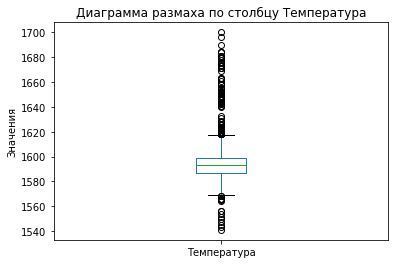

In [19]:
df_5 = df_5[df_5['Температура'] > 1400]
df_5['Температура'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу Температура', ylabel = 'Значения')
plt.show()

In [20]:
# Преобразование столбцов с временем в формат datetime
df_1['Начало нагрева дугой'] = pd.to_datetime(df_1['Начало нагрева дугой'])
df_1['Конец нагрева дугой'] = pd.to_datetime(df_1['Конец нагрева дугой'])

# Вычисление длительности нагрева дугой и добавление нового столбца
df_1['Длительность нагрева дугой'] = (df_1['Конец нагрева дугой'] - df_1['Начало нагрева дугой']).dt.total_seconds()

#тоже самое делаем с активной и реактивной мощностями
df_1['Конец нагрева дугой'] = pd.to_datetime(df_1['Конец нагрева дугой'])

# Сортировка данных по времени замера внутри каждой партии
df_1 = df_1.sort_values(by=['key', 'Конец нагрева дугой'])

# Выбор последних записей из каждой группы
last_temp_per_key = df_1.groupby('key').sum()

df_1 = last_temp_per_key

Столбцы с датами задействовать не будем, так как они все равно будут удалены за ненадобностью после обьединения датафреймов.

In [21]:
df_1

,Активная мощность,Реактивная мощность,Длительность нагрева дугой
key,,,
1,3.036730,2.142821,1098.0
2,2.139408,1.453357,811.0
3,4.063641,2.937457,655.0
4,2.706489,2.056992,741.0
5,2.252950,1.687991,869.0
...,...,...,...
3237,2.541872,2.025417,909.0
3238,1.374821,1.038103,546.0
3239,4.848005,3.541541,1216.0


count    3214.000000
mean        3.067329
std         1.208697
min         0.267676
25%         2.235394
50%         2.984581
75%         3.775472
max        12.375636
Name: Активная мощность, dtype: float64

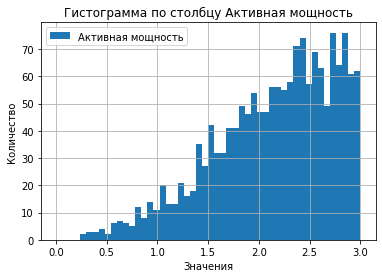

In [22]:
#Проводим анализ всех имеющихся признаков
df_1.plot(y = 'Активная мощность', kind = 'hist', bins = 50, grid=True, range = (0, 3), title = 'Гистограмма по столбцу Активная мощность')
plt.xlabel('Значения')
plt.ylabel('Количество')
df_1['Активная мощность'].describe()

Распределение нормальное, пиковые значения около 0.5. Среднее - 0.662749, минимальное - 0.223120, максимальное - 1.463773.

count    3214.000000
mean        2.254462
std         0.894743
min         0.196228
25%         1.630658
50%         2.176833
75%         2.788330
max         8.949049
Name: Реактивная мощность, dtype: float64

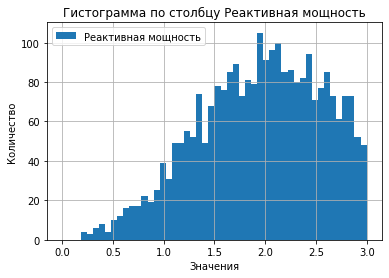

In [23]:
df_1.plot(y = 'Реактивная мощность', kind = 'hist', bins = 50, grid=True, range = (0, 3), title = 'Гистограмма по столбцу Реактивная мощность')
plt.xlabel('Значения')
plt.ylabel('Количество')
df_1['Реактивная мощность'].describe()

Распределение нормальное, пиковые значения около 0.5. Среднее - 0.487115, минимальное - 0.153777, максимальное - 1.270284.

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64

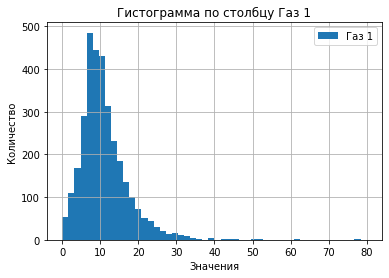

In [24]:
df_4.plot(y = 'Газ 1', kind = 'hist', bins = 50, grid=True, range = (0, 80), title = 'Гистограмма по столбцу Газ 1')
plt.xlabel('Значения')
plt.ylabel('Количество')
df_4['Газ 1'].describe()

Распределение нормальное, пиковые значения около 5. Среднее - 11.002062, минимальное - 0.008399, максимальное - 77.995040.

count    2477.000000
mean     1595.334275
std        16.019339
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1599.000000
max      1700.000000
Name: Температура, dtype: float64

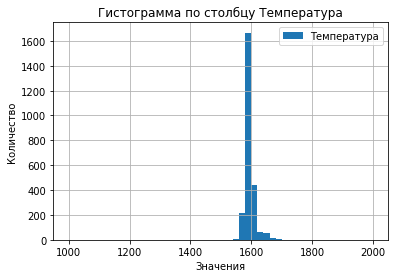

In [25]:
df_5.plot(y = 'Температура', kind = 'hist', bins = 50, grid=True, range = (1000, 2000), title = 'Гистограмма по столбцу Температура')
plt.xlabel('Значения')
plt.ylabel('Количество')
df_5['Температура'].describe()

Распределение нормальное, пиковые значения около 1590. Среднее - 1590.722741, минимальное - 1191.000000, максимальное - 1705.000000.

Вывод: В данной части была проведена предобработка и исследовательский анализ данных. Были удалены нулевые значения, где это необходимо. Так же были удалены аномалии. Во время исследовательского анализа, ничего необычного найдено не было.

## Объединение данных

In [26]:
#Обьединяем данные (3 и 7 датафрейм нам не нужны, так как там даты)
df = pd.merge(df_1, df_2, on='key', how='inner')
df = pd.merge(df, df_4, on='key', how='inner')
df = pd.merge(df, df_5, on='key', how='inner')
df = pd.merge(df, df_6, on='key', how='inner')
df

,key,Активная мощность,Реактивная мощность,Длительность нагрева дугой,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,3.036730,2.142821,1098.0,NaN,NaN,NaN,43.0,NaN,NaN,...,1613.0,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2.139408,1.453357,811.0,NaN,NaN,NaN,73.0,NaN,NaN,...,1602.0,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4.063641,2.937457,655.0,NaN,NaN,NaN,34.0,NaN,NaN,...,1599.0,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2.706489,2.056992,741.0,NaN,NaN,NaN,81.0,NaN,NaN,...,1625.0,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.252950,1.687991,869.0,NaN,NaN,NaN,78.0,NaN,NaN,...,1602.0,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,3.168133,2.210936,723.0,NaN,NaN,21.0,NaN,NaN,NaN,...,1591.0,89.150879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2325,2496,4.174918,2.872031,940.0,NaN,NaN,NaN,63.0,NaN,NaN,...,1591.0,114.179527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2326,2497,3.605239,2.452092,569.0,NaN,NaN,NaN,85.0,NaN,NaN,...,1589.0,94.086723,9.04800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2327,2498,3.202310,2.239820,750.0,NaN,NaN,90.0,NaN,NaN,NaN,...,1594.0,118.110717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: В данной части работы мы обьединили данные, которые будет обрабатывать в следующей части работы.

## Исследовательский анализ и предобработка данных объединённого датафрейма

In [27]:
#Удаляем ненужные строки, где нет данных по активной и реактивной мощности
df = df.dropna(subset=['Активная мощность'])
df = df.dropna(subset=['Реактивная мощность'])
df

,key,Активная мощность,Реактивная мощность,Длительность нагрева дугой,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,3.036730,2.142821,1098.0,NaN,NaN,NaN,43.0,NaN,NaN,...,1613.0,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2.139408,1.453357,811.0,NaN,NaN,NaN,73.0,NaN,NaN,...,1602.0,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4.063641,2.937457,655.0,NaN,NaN,NaN,34.0,NaN,NaN,...,1599.0,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2.706489,2.056992,741.0,NaN,NaN,NaN,81.0,NaN,NaN,...,1625.0,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.252950,1.687991,869.0,NaN,NaN,NaN,78.0,NaN,NaN,...,1602.0,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,3.168133,2.210936,723.0,NaN,NaN,21.0,NaN,NaN,NaN,...,1591.0,89.150879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2325,2496,4.174918,2.872031,940.0,NaN,NaN,NaN,63.0,NaN,NaN,...,1591.0,114.179527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2326,2497,3.605239,2.452092,569.0,NaN,NaN,NaN,85.0,NaN,NaN,...,1589.0,94.086723,9.04800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2327,2498,3.202310,2.239820,750.0,NaN,NaN,90.0,NaN,NaN,NaN,...,1594.0,118.110717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#оставляем только данные wire 1 и bulk 12, так как там меньше всего пропусков, потом удаляем все пропущенные значения
columns_to_drop = [f'Wire {i}' for i in range(2, 10)] + [f'Bulk {i}' for i in range(0, 12)] + [f'Bulk {i}' for i in range(13, 16)]
df = df.drop(columns=columns_to_drop, errors='ignore')
df['Bulk 12'] = df['Bulk 12'].fillna(0)
df['Wire 1'] = df['Wire 1'].fillna(0)
df

,key,Активная мощность,Реактивная мощность,Длительность нагрева дугой,Bulk 12,Газ 1,Температура_y,Температура,Wire 1
0,1,3.036730,2.142821,1098.0,206.0,29.749986,1571.0,1613.0,60.059998
1,2,2.139408,1.453357,811.0,206.0,12.555561,1581.0,1602.0,96.052315
2,3,4.063641,2.937457,655.0,205.0,28.554793,1596.0,1599.0,91.160157
3,4,2.706489,2.056992,741.0,207.0,18.841219,1601.0,1625.0,89.063515
4,5,2.252950,1.687991,869.0,203.0,5.413692,1576.0,1602.0,89.238236
...,...,...,...,...,...,...,...,...,...
2324,2495,3.168133,2.210936,723.0,256.0,7.125735,1570.0,1591.0,89.150879
2325,2496,4.174918,2.872031,940.0,256.0,9.412616,1554.0,1591.0,114.179527
2326,2497,3.605239,2.452092,569.0,230.0,6.271699,1571.0,1589.0,94.086723
2327,2498,3.202310,2.239820,750.0,206.0,14.953657,1591.0,1594.0,118.110717


In [29]:
#делаем ключ индексом
df.set_index('key', inplace=True)
df

,Активная мощность,Реактивная мощность,Длительность нагрева дугой,Bulk 12,Газ 1,Температура_y,Температура,Wire 1
key,,,,,,,,
1,3.036730,2.142821,1098.0,206.0,29.749986,1571.0,1613.0,60.059998
2,2.139408,1.453357,811.0,206.0,12.555561,1581.0,1602.0,96.052315
3,4.063641,2.937457,655.0,205.0,28.554793,1596.0,1599.0,91.160157
4,2.706489,2.056992,741.0,207.0,18.841219,1601.0,1625.0,89.063515
5,2.252950,1.687991,869.0,203.0,5.413692,1576.0,1602.0,89.238236
...,...,...,...,...,...,...,...,...
2495,3.168133,2.210936,723.0,256.0,7.125735,1570.0,1591.0,89.150879
2496,4.174918,2.872031,940.0,256.0,9.412616,1554.0,1591.0,114.179527
2497,3.605239,2.452092,569.0,230.0,6.271699,1571.0,1589.0,94.086723


In [30]:
#Строим матрицу phik
phik_matrix(df)

interval columns not set, guessing: ['Активная мощность', 'Реактивная мощность', 'Длительность нагрева дугой', 'Bulk 12', 'Газ 1', 'Температура_y', 'Температура', 'Wire 1']


,Активная мощность,Реактивная мощность,Длительность нагрева дугой,Bulk 12,Газ 1,Температура_y,Температура,Wire 1
Активная мощность,1.000000,0.977717,0.782624,0.501017,0.572667,0.214494,0.481373,0.182698
Реактивная мощность,0.977717,1.000000,0.775084,0.526821,0.715282,0.161449,0.365057,0.139342
Длительность нагрева дугой,0.782624,0.775084,1.000000,0.517436,0.501014,0.307807,0.317842,0.093824
Bulk 12,0.501017,0.526821,0.517436,1.000000,0.728225,0.083026,0.274426,0.444580
Газ 1,0.572667,0.715282,0.501014,0.728225,1.000000,0.103394,0.290854,0.362799
Температура_y,0.214494,0.161449,0.307807,0.083026,0.103394,1.000000,0.336279,0.253261
Температура,0.481373,0.365057,0.317842,0.274426,0.290854,0.336279,1.000000,0.470512
Wire 1,0.182698,0.139342,0.093824,0.444580,0.362799,0.253261,0.470512,1.000000


Имеется мультиколлинеарность между активной и реактивной мощностями, удалим реактивную мощность.

In [31]:
df = df.drop(['Реактивная мощность'], axis=1)
#Оказалось что этот фактор практически не влияет на модель, так что его можно удалить
df = df.drop(['Газ 1'], axis=1)
df

,Активная мощность,Длительность нагрева дугой,Bulk 12,Температура_y,Температура,Wire 1
key,,,,,,
1,3.036730,1098.0,206.0,1571.0,1613.0,60.059998
2,2.139408,811.0,206.0,1581.0,1602.0,96.052315
3,4.063641,655.0,205.0,1596.0,1599.0,91.160157
4,2.706489,741.0,207.0,1601.0,1625.0,89.063515
5,2.252950,869.0,203.0,1576.0,1602.0,89.238236
...,...,...,...,...,...,...
2495,3.168133,723.0,256.0,1570.0,1591.0,89.150879
2496,4.174918,940.0,256.0,1554.0,1591.0,114.179527
2497,3.605239,569.0,230.0,1571.0,1589.0,94.086723


Вывод: Была проведена предобработка и анализ данных в обьединенном датафрейме, данные были сокращены для возможности построения моедли с ними.

## Подготовка данных и обучение модели

In [32]:
# Разделяем данные на признаки и целевую переменную
X = df.drop(['Температура'], axis=1)
y = df['Температура']

# Разбиение данных на обучающую (75%) и тестовую (25%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0o40324, shuffle=True)

In [33]:
# Определение количественных и категориальных признаков
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

In [34]:
# Создание трансформатора для количественных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создание ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Создание пайплайна предварительной обработки данных и поиска лучшей модели
models = {
    'LinearRegression': {'model': LinearRegression(), 'param_grid': {}},
    'DecisionTreeRegressor': {'model': DecisionTreeRegressor(random_state=42), 
                              'param_grid': {'regressor__max_depth': [5, 10, 15]}},
    'RandomForestRegressor': {'model': RandomForestRegressor(random_state=42), 'param_grid': {
            'regressor__n_estimators': [50, 100, 200],
            'regressor__max_depth': [5, 10, 15]
        }}
}

LinearRegression: Лучшие параметры - {}
LinearRegression: Лучшая модель - Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Активная мощность', 'Длительность нагрева дугой', 'Bulk 12',
       'Температура_y', 'Wire 1'],
      dtype='object'))])),
                ('regressor', LinearRegression())])
LinearRegression: Средняя оценка кросс-валидации - 7.043313487965598

DecisionTreeRegressor: Лучшие параметры - {'regressor__max_depth': 5}
DecisionTreeRegressor: Лучшая модель - Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
    

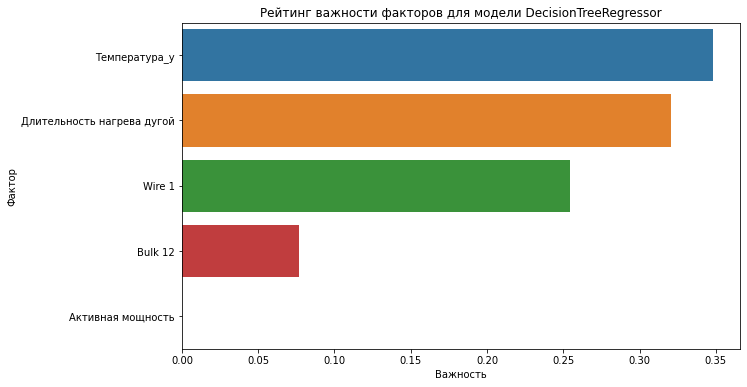

RandomForestRegressor: Лучшие параметры - {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
RandomForestRegressor: Лучшая модель - Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Активная мощность', 'Длительность нагрева дугой', 'Bulk 12',
       'Температура_y', 'Wire 1'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=200,
                                       random_state=42))])
RandomForestRegressor: Средняя оценка кросс-валидации - 6.64393758842626



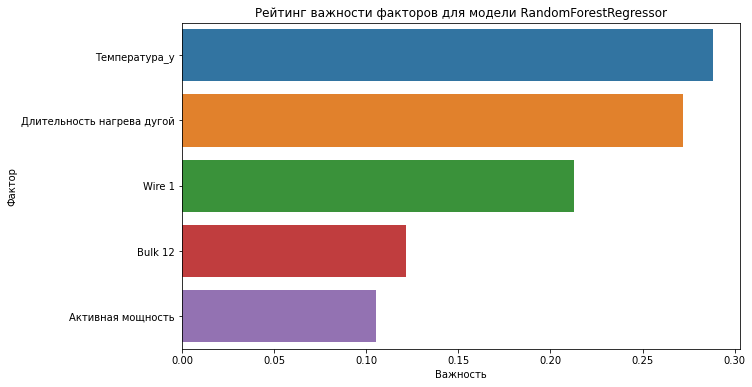

In [35]:
results = {}

for model_name, config in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', config['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, config['param_grid'], cv=5, scoring='neg_mean_absolute_error')
    
    grid_search.fit(X_train, y_train)
    cv_scores = cross_val_score(grid_search, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    print(f"{model_name}: Лучшие параметры - {grid_search.best_params_}")
    print(f"{model_name}: Лучшая модель - {grid_search.best_estimator_}")
    
    # Вывод средней оценки кросс-валидации
    print(f"{model_name}: Средняя оценка кросс-валидации - {abs(cv_scores).mean()}\n")
    
    # Получение важности признаков
    if hasattr(grid_search.best_estimator_['regressor'], 'feature_importances_'):
        feature_importances = grid_search.best_estimator_['regressor'].feature_importances_
        
        # Названия факторов (это названия столбцов в DataFrame)
        feature_names = X.columns
        
        # Создаем DataFrame с важностями факторов
        feature_importance_df = pd.DataFrame({'Фактор': feature_names, 'Важность': feature_importances})
        
        # Сортируем важности по убыванию
        feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)
        
        # Выводим график
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Важность', y='Фактор', data=feature_importance_df)
        plt.title(f'Рейтинг важности факторов для модели {model_name}')
        plt.xlabel('Важность')
        plt.ylabel('Фактор')
        plt.show()
    
    results[model_name] = {
        'best_params': grid_search.best_estimator_['regressor'].get_params(),
        'best_model': grid_search.best_estimator_,
        'cv_scores': cv_scores,
        'feature_importances': feature_importances if hasattr(grid_search.best_estimator_['regressor'], 'feature_importances_') else None
    }

Вывод: В данной части работы мы подготовили данные и обучили модели. Лучшей моделью оказалась модель RandomForestRegressor с показателем mae - 6.64393758842626, ее мы и будем тестировать.

## Выбор лучшей модели

In [36]:
# Извлекаем лучшую модель RandomForestRegressor
best_RandomForestRegressor_model = results['RandomForestRegressor']['best_model']

# Предсказания на тестовой выборке
y_test_pred = best_RandomForestRegressor_model.predict(X_test)

# Рассчитываем MAE на тестовой выборке
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"best_RandomForestRegressor_model на тестовой выборке: MAE - {test_mae}")

best_RandomForestRegressor_model на тестовой выборке: MAE - 6.990098120319094


Вывод: В данной части работы была протестирована выбранная модель, она показала, тоже хорошие результаты чем во время обучения - 10.460512407268702.

## Общий вывод и рекомендации заказчику

В данной работе была построена модель для предсказывания температуры сплава. Для этого сначала мы провели загрузку и предобработку данных, где удалили все аномалии и часть пропущенных значений. Далее мы провели исследовательсикй анализ данных, для большого количества столбцов. Далее мы обьединили датафреймы и предобработали их, чтобы можно было построить модель. Там мы сократили большое количество ненужных данных. Далее мы обучили несколько моделей, где выяснили, что RandomForestRegressor является самой эффективный, что и подтвердилось на тестах. Именно эту модель мы и советуем использовать заказчику.